In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [2]:
!pip install pandas_datareader

Defaulting to user installation because normal site-packages is not writeable


### Визуализация данных при помощи пакета `matplotlib`

1\. В файле `average_ratings.npy` содержится информация о среднем рейтинге 3 рецептов за период с 01.01.2019 по 30.12.2021. При помощи пакета `matplotlib` в _одной системе координат_ (на одной картинке) изобразите три временных ряда, соответствующих средним рейтингам этих рецептов. 

По горизонтальной оси располагается номер дня (0, 1, 2, ...), по вертикальной - средний рейтинг рецептов в этот день. 

Названия рецептов и их индексы в файле `average_ratings.npy`:
```
0: waffle iron french toast
1: zwetschgenkuchen bavarian plum cake
2: lime tea
```

Результатом работы является визуализация, на которой:
* добавлена подпись горизонтальной оси с текстом "Номер дня"
* добавлена подпись вертикальной оси с текстом "Средний рейтинг"
* добавлена подпись рисунка с текстом "Изменение среднего рейтинга трех рецептов"
* каждый из временных рядов имеет уникальный цвет
* добавлена легенда, на которой отображается название каждого из рецептов

_Примечание_ : для считывания файла воспользуйтесь функцией `np.load`.

In [122]:
test = np.load ('average_ratings.npy', encoding = "latin1") # Загрузить файл
doc = open ('1.txt', 'a') # Открываем файл хранилища и записываем последовательно
df = pd.DataFrame(test)
df

,0,1,2,3,4,5,6,7,8,9,...,1085,1086,1087,1088,1089,1090,1091,1092,1093,1094
0,5.0,5.013103,5.026240,5.013103,5.000000,4.986932,5.000000,5.013103,5.000000,4.986932,...,5.451021,5.436773,5.451021,5.465305,5.479627,5.493987,5.508384,5.522819,5.537292,5.522819
1,7.0,6.970750,7.000000,6.970750,6.941621,6.970750,7.000000,6.970750,7.000000,7.029373,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
2,3.0,2.996861,2.993725,2.996861,3.000000,2.996861,2.993725,2.996861,2.993725,2.996861,...,2.984338,2.981216,2.984338,2.981216,2.984338,2.987464,2.990593,2.993725,2.990593,2.987464


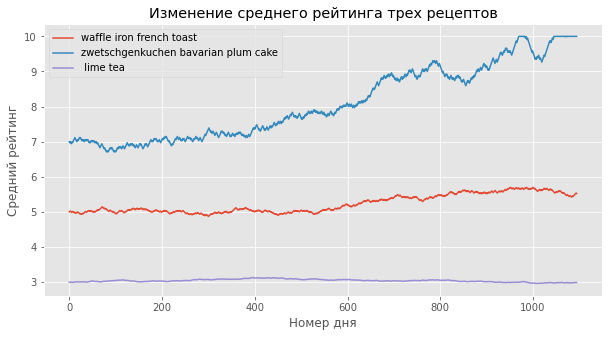

In [123]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
a = df.iloc[0, :]
b = df.iloc[1, :]
c = df.iloc[2, :]
plt.plot(a, label = 'waffle iron french toast')
plt.plot(b, label = 'zwetschgenkuchen bavarian plum cake')
plt.plot(c, label = ' lime tea')
ax.set_xlabel('Номер дня')
ax.set_ylabel('Средний рейтинг')
ax.set_title("Изменение среднего рейтинга трех рецептов")
ax.legend()


2\. Измените визуализацию, полученную в задании 1, таким образом, чтобы по горизонтальной оси отображались года, а между двумя соседними годами располагались засечки, соответствующие месяцам. Для этого создайте диапазон дат от 01.01.2019 по 30.12.2021 с шагом в один день (например, [вот так](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html)) и используйте этот диапазон при вызове метода `plot`. Далее настройте `major_locator` и `minor_locator` горизонтальной оси (подробнее см. [здесь](https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html))

Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 1. Измените подпись горизонтальной оси, написав там слово "Дата".


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: UserWarning: Parsing '30.12.2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  exec(code_obj, self.user_global_ns, self.user_ns)


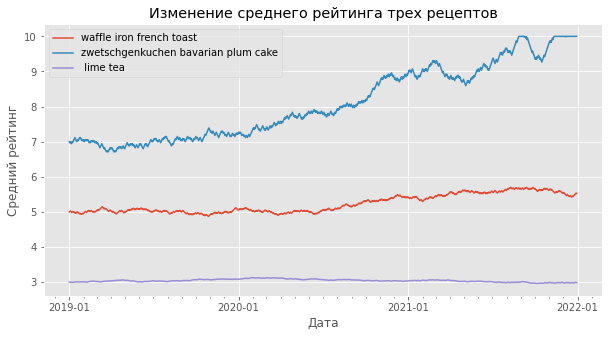

In [124]:
df.columns = pd.date_range(start = '01.01.2019', end = '30.12.2021')

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
a = df.iloc[0, :]
b = df.iloc[1, :]
c = df.iloc[2, :]
plt.plot(a, label = 'waffle iron french toast')
plt.plot(b, label = 'zwetschgenkuchen bavarian plum cake')
plt.plot(c, label = ' lime tea')
ax.set_xlabel('Дата')
ax.set_ylabel('Средний рейтинг')
ax.set_title("Изменение среднего рейтинга трех рецептов")
ax.legend()


ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 1)))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.grid(True)

3\. Измените визуализацию, полученную в задании 2, разбив одну картинку на три, расположенных друг под другом. Три изображения должны иметь одну общую горизонтальную ось (каждое изображение засечки в нижней части, но значения этих засечек находятся только под самым нижним изображением). Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 2. 

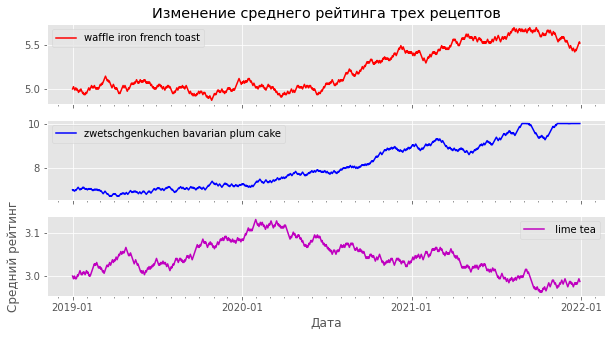

In [179]:
df.columns = pd.date_range(start = '01.01.2019', end = '30.12.2021')

fig, ax = plt.subplots(3, 1, figsize=(10, 5), sharex = True)
print()
a = df.iloc[0, :]
b = df.iloc[1, :]
c = df.iloc[2, :]

ax[0].plot(a, label = 'waffle iron french toast', color = 'r')
ax[1].plot(b, label = 'zwetschgenkuchen bavarian plum cake', color = 'b')
ax[2].plot(c, label = ' lime tea', color = 'm')
ax[-1].set_xlabel('Дата')
ax[-1].set_ylabel('Средний рейтинг')
ax[0].set_title("Изменение среднего рейтинга трех рецептов")
ax[0].legend()
ax[1].legend()
ax[2].legend()



ax[2].xaxis.set_major_locator(mdates.YearLocator())
ax[2].xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 1)))
ax[2].xaxis.set_minor_locator(mdates.MonthLocator())
ax[2].grid(True)

4\. В файле `visitors.npy` представлена информация о количестве посетителей сайта в течении первых 100 дней после объявления сайтом акции. Постройте график изменения количества пользователей в зависимости от дня в двух вариантах, расположенных рядом по горизонтале. В обоих случаях изобразите график в виде ломаной, но в первом случае оставьте линейный масштаб осей, а во втором случае сделайте вертикальную ось в логарифмическом масштабе. Добавьте на обе картинки подпись над этим графиком к текстом $y(x)=\lambda e^{-\lambda x}$

Добавьте на оба изображения красную горизонтальную линию на уровне $y=100$. Добавьте на обе картинки подпись над этой линией с текстом $y(x)=100$

Добавьте на оба изображения подписи осей; горизонтальную ось подпишите текстом "Количество дней с момента акции", вертикальную - "Число посетителей".

Добавьте общий заголовок для фигуры с текстом "Изменение количества пользователей в линейном и логарифмическом масштабе".


In [181]:
test = np.load ('visitors.npy', encoding = "latin1") # Загрузить файл
doc = open ('1.txt', 'a') # Открываем файл хранилища и записываем последовательно
df2 = pd.DataFrame(test)
df2.head()

,0
0,2311
1,2023
2,1839
3,1523
4,1371


Text(0.5, 0.98, 'Изменение количества пользователей в линейном и логарифмическом масштабе')

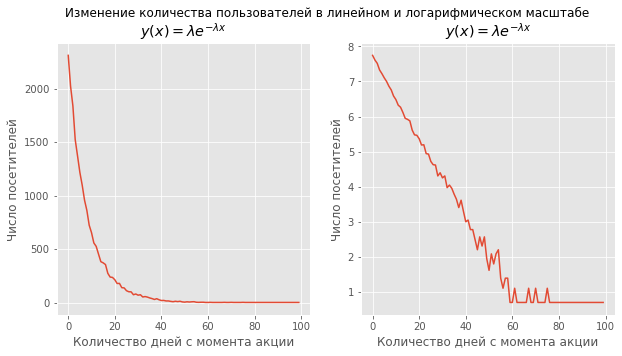

In [247]:
import math
from matplotlib.lines import Line2D

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
math.log(df2.iloc[2])
a = [math.log(df2.iloc[i]) for i in range(df2.shape[0])]
df3 = pd.DataFrame(a)
ax[0].plot(df2)
ax[1].plot(df3)



ax[0].set_xlabel('Количество дней с момента акции')
ax[0].set_ylabel('Число посетителей')
ax[1].set_xlabel('Количество дней с момента акции')
ax[1].set_ylabel('Число посетителей')

ax[0].set_title('$y(x)=\lambda e^{-\lambda x}$')
ax[1].set_title('$y(x)=\lambda e^{-\lambda x}$')


fig.suptitle('Изменение количества пользователей в линейном и логарифмическом масштабе')

Text(50, 100, '$y(x)=100$')

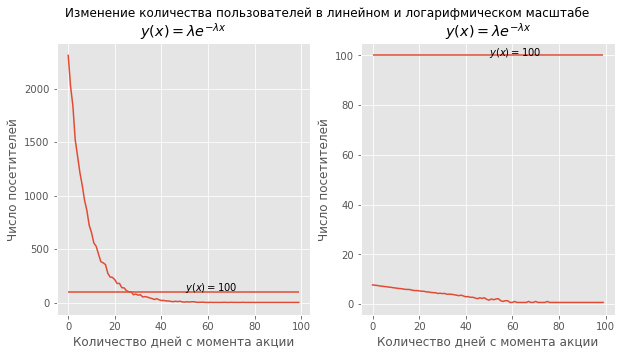

In [262]:
import math
from matplotlib.lines import Line2D

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
math.log(df2.iloc[2])
a = [math.log(df2.iloc[i]) for i in range(df2.shape[0])]
df3 = pd.DataFrame(a)
ax[0].plot(df2)
ax[1].plot(df3)



ax[0].set_xlabel('Количество дней с момента акции')
ax[0].set_ylabel('Число посетителей')
ax[1].set_xlabel('Количество дней с момента акции')
ax[1].set_ylabel('Число посетителей')

ax[0].set_title('$y(x)=\lambda e^{-\lambda x}$')
ax[1].set_title('$y(x)=\lambda e^{-\lambda x}$')


fig.suptitle('Изменение количества пользователей в линейном и логарифмическом масштабе')

fig.suptitle('Изменение количества пользователей в линейном и логарифмическом масштабе')

ax[0].hlines(100, df2.index[0], df2.index[-1])
ax[1].hlines(100, df2.index[0], df2.index[-1])

ax[0].text(50, 110, "$y(x)=100$")
ax[1].text(50, 100, "$y(x)=100$")

### Визуализация данных на основе структур `pandas`.

Для продолжения работы загрузите таблицы recipes и reviews (__ЛР2__)

In [366]:
reviews =  pd.read_csv('reviews_sample.csv', index_col = 'Unnamed: 0')
recipes = pd.read_csv('recipes_sample.csv')
recipes.head()

,name,id,minutes,contributor_id,submitted,n_steps,description,n_ingredients
0,george s at the cove black bean soup,44123,90,35193,2002-10-25,NaN,an original recipe created by chef scott meska...,18.0
1,healthy for them yogurt popsicles,67664,10,91970,2003-07-26,NaN,my children and their friends ask for my homem...,NaN
2,i can t believe it s spinach,38798,30,1533,2002-08-29,NaN,"these were so go, it surprised even me.",8.0
3,italian gut busters,35173,45,22724,2002-07-27,NaN,my sister-in-law made these for us at a family...,NaN
4,love is in the air beef fondue sauces,84797,25,4470,2004-02-23,4.0,i think a fondue is a very romantic casual din...,NaN


5\. Назовем рецепты короткими, если они занимают строго меньше 5 минут; средними, если они занимают от 5 до 50 минут (не включая 50), и длинными, если они занимают от 50 минут и больше. Сгруппируйте все рецепты по данному признаку и для каждой группы посчитайте 2 величины: среднее количество шагов рецептов в группе и размер группы. При помощи методов структур `pandas` постройте столбчатую диаграмму, где каждый столбец означает группу (короткие, средние или длинные рецепты), а высота столбца обозначает среднее количество шагов рецептов в группе. Рядом по горизонтали разместите круговую диаграмму, на которой отображены размеры каждой из групп.

Добавьте следующие подписи:
* по горизонтальной оси под столбчатой диаграммой напишите "Группа рецептов"
* по вертикальной оси слева от столбчатой диаграммы напишите "Средняя длительность"
* над круговой диаграммой напишите "Размеры групп рецептов"

In [367]:
short = recipes[recipes['minutes'] <= 5]
middle =  recipes[(recipes['minutes'] > 5) & (recipes['minutes'] < 50) ]
long = recipes[(recipes['minutes'] >= 50)]

In [373]:


recipes['filter'] = np.where(recipes['minutes'] <= 5, 'short', np.where((recipes['minutes'] > 5) & (recipes['minutes'] < 50), 'middle','long'))
# recipes['filter'] = np.where((recipes['minutes'] > 5) & (recipes['minutes'] < 50) & (recipes['filter'] == '0'), 'middle', 'long')


6\. Из всего множества отзывов оставьте только те, которые были даны в 2008 и 2009 годах. Воспользовавшись возможностями метода `pd.DataFrame.plot.hist`, постройте 2 гистограммы столбца `rating`. Гистограммы должны быть расположены рядом по горизонтали. Левая гистограмма соотвествует 2008 году, правая - 2009 году. Добавьте общую подпись для рисунка с текстом "Гистограммы рейтинга отзывов в 2008 и 2009 годах". Добейтесь того, чтобы подпись вертикальной оси правого рисунка не "наезжала" на левый рисунок.

### Визуализация данных при помощи пакета `seaborn`

7\. При помощи пакета `seaborn` постройте диаграмму рассеяния двух столбцов из таблицы `recipes`: `n_steps` и `n_ingredients`. Укажите в качестве группирующей переменной (hue) категориальную длительность рецепта (короткий, средний или длинные; см. задание 5). 

Добавьте заголовок рисунка "Диаграмма рассеяния n_steps и n_ingredients"

Прокомментируйте, наблюдается ли визуально линейная зависимость между двумя этими переменными. Ответ оставьте в виде текстовой ячейки под изображением.

Text(0.5, 1.0, 'Диаграмма рассеяния n_steps и n_ingredients')

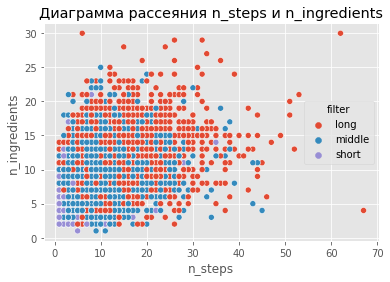

In [374]:
col = recipes[['n_steps', 'n_ingredients']]
graph = sns.scatterplot(
    x=recipes['n_steps'], 
    y = recipes['n_ingredients'], 
    data=recipes, hue = recipes['filter'])
graph.set_title("Диаграмма рассеяния n_steps и n_ingredients")

8\. Объедините две таблицы `recipes` и `reviews` и постройте корреляционную матрицу на основе столбцов "minutes", "n_steps", "n_ingredients" и "rating". При помощи пакета `seaborn` визуализируйте полученную матрицу в виде тепловой карты (heatmap). 

Добавьте в ячейки тепловой карты подписи (значения к-та корреляции). Измените цветовую палитру на `YlOrRd`. 

Добавьте заголовок рисунка "Корреляционная матрица числовых столбцов таблиц recipes и reviews"

Text(0.5, 1.0, 'Корреляционная матрица числовых столбцов таблиц recipes и reviews')

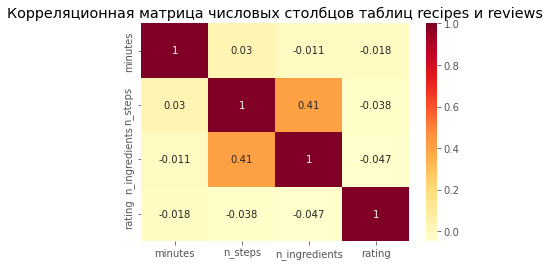

In [383]:
df_join = recipes.merge(reviews, left_on='id', right_on='user_id',how='left')[["minutes", "n_steps", "n_ingredients",'rating']]
map_= sns.heatmap(df_join.corr(), annot=True,  cmap = 'YlOrRd')
map_.set_title("Корреляционная матрица числовых столбцов таблиц recipes и reviews")